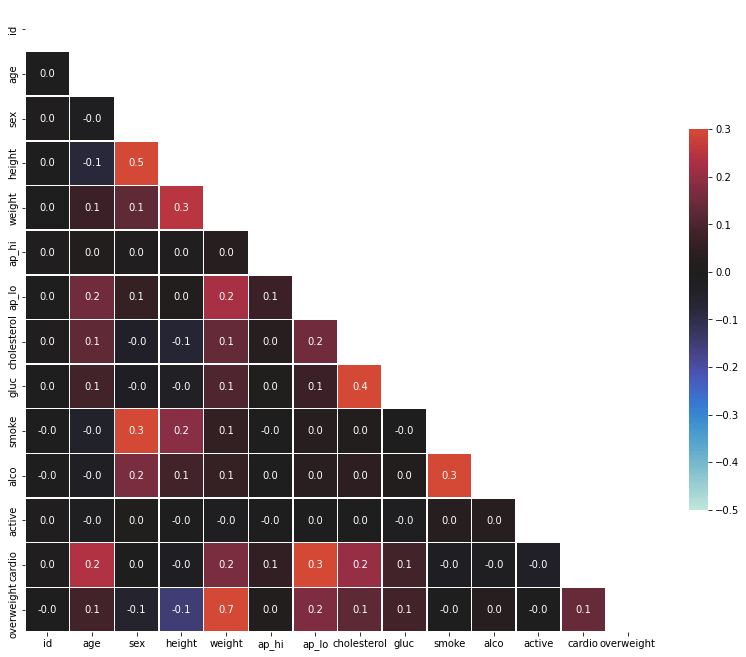

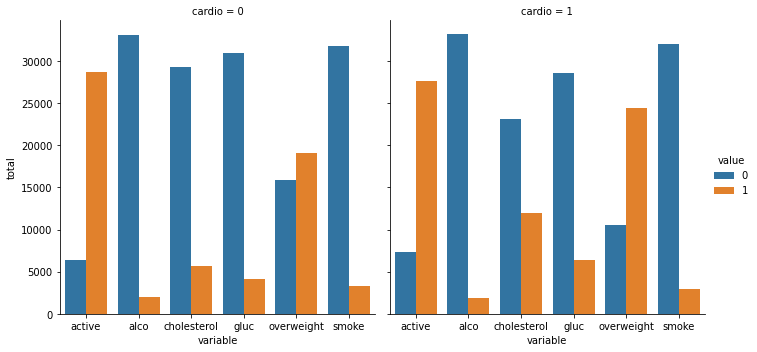

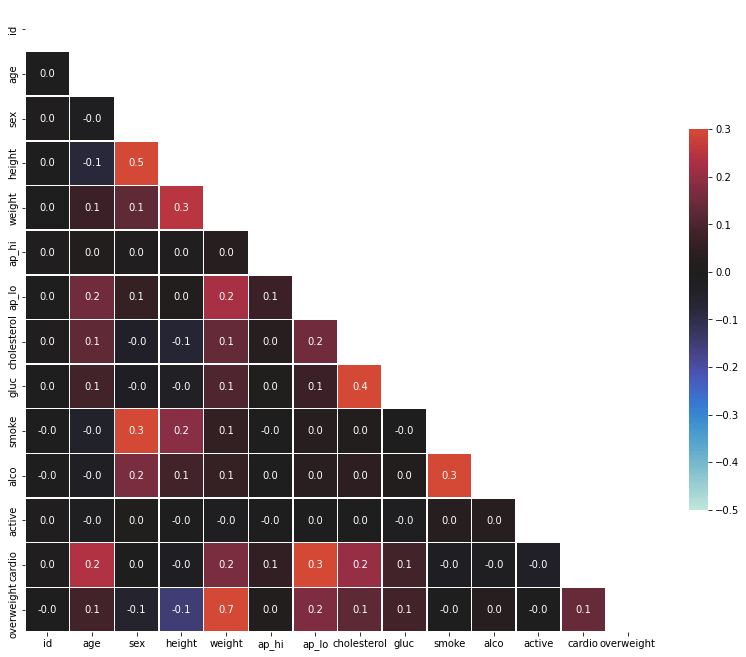

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column

BMI = (df.weight/ ((df['height']/100)**2))
df['overweight'] = np.where(BMI >= 25, 1, 0)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df['cholesterol'] = np.where(df['cholesterol'] > 1, 1, 0)
df['gluc'] = np.where(df['gluc'] > 1, 1, 0)

# Draw Categorical Plot

def draw_cat_plot():
  
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
  
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
  
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'])['value'].count().to_frame()
    df_cat.rename(columns= {'value': 'total'}, inplace = True)
    df_cat.reset_index(inplace = True)

    # Draw the catplot with 'sns.catplot()'
    catplot = sns.catplot(
      data = df_cat,
      x = 'variable',
      y = 'total',
      hue = 'value',
      col = 'cardio',
      kind = 'bar'
    )

    # Get the figure for the output
    fig = catplot.fig

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

# Draw Heat Map
def draw_heat_map():
    # Clean the data
    #Clean the data:
  
    df_heat = df[(df['ap_lo']<=df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025))&
    (df['height'] <= df['height'].quantile(0.975))&
    (df['weight'] >= df['weight'].quantile(0.025))&
    (df['weight'] <= df['weight'].quantile(0.975))
    ]
   
    # Calculate the correlation matrix
    corr = df_heat.corr(method='pearson')

    # Set up the matplotlib figure
    #Set up the matplotlib figure. 

    fig, ax = plt.subplots(figsize=(14,14))
  
     # Generate a mask for the upper triangle
  
    mask = np.triu(np.ones_like(corr, dtype = bool))

    # Draw the heatmap with 'sns.heatmap()'
    #Draw the heatmap with sns.heatmap():
    fig = sns.heatmap(corr, mask=mask, annot=True, fmt='.1f',vmax=.3, linewidth=.5, cbar_kws= {'shrink':0.5}, square=True, center=0, vmin=-0.5)
    fig = fig.figure


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

draw_cat_plot()
draw_heat_map()